<a href="https://colab.research.google.com/github/kexinez/NYU_Integrated_Marketing/blob/main/%E2%80%9CPredicting_Customer_Churn_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install pingouin

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/kexinez/NYU_Integrated_Marketing/main/insurance.csv')
df=df.dropna()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

# Correlation


In [ ]:
# install the software
import pingouin as pg

### The pairwise correlation 
https://pingouin-stats.org/generated/pingouin.pairwise_corr.html#pingouin.pairwise_corr

In [ ]:
pg.pairwise_corr(df,columns=['children', 'bmi'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,children,bmi,pearson,two-sided,1338,0.013,"[-0.04, 0.07]",0.0,-0.001,0.013,0.641,0.038,0.075


In [ ]:
pg.pairwise_corr(df,columns=['chi', 'bmi','sex'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,bmi,age,pearson,two-sided,1338,0.109,"[0.06, 0.16]",0.012,0.010,0.110,0.000,103.37,0.980
1,bmi,children,pearson,two-sided,1338,0.013,"[-0.04, 0.07]",0.000,-0.001,0.013,0.641,0.038,0.075
2,bmi,charges,pearson,two-sided,1338,0.198,"[0.15, 0.25]",0.039,0.038,0.201,0.000,1.447e+10,1.000


### The Partial correlation
https://pingouin-stats.org/generated/pingouin.partial_corr.html#pingouin.partial_corr

In [ ]:
# Partial correlation of total_day_calls and number_customer_service_calls controlling for account_length
x='children'
y='bmi'
control='sex'
pg.partial_corr(data=df, x=x, y=y, covar=control, method='pearson').round(3)

AssertionError: ignored

# Regression

## Scatterplot
https://seaborn.pydata.org/generated/seaborn.scatterplot.html


In [ ]:
#install the package
import seaborn as sns

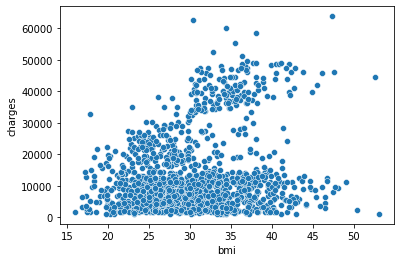

In [ ]:
x='bmi'
y='charges'
sns.scatterplot(data=df,x=x,y=y)

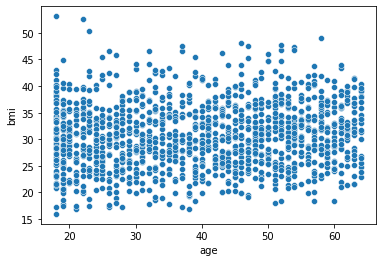

In [ ]:
x='age'
y='bmi'
sns.scatterplot(data=df, x=x, y=y)

### Regression Result
https://www.statsmodels.org/stable/regression.html

In [ ]:
import statsmodels.api as sm

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
# define the dependent and independent variables
X=df[['children','bmi']]
y=df['charges']


In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,children,bmi
0,1.0,0,27.900
1,1.0,1,33.770
2,1.0,3,33.000
3,1.0,0,22.705
4,1.0,0,28.880


In [ ]:
# conduct regression
model = sm.OLS(y, X).fit()

In [ ]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     30.45
Date:                Mon, 07 Dec 2020   Prob (F-statistic):           1.17e-13
Time:                        17:06:10   Log-Likelihood:                -14448.
No. Observations:                1338   AIC:                         2.890e+04
Df Residuals:                    1335   BIC:                         2.892e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        523.5995   1684.084      0.311      0.7

### Check assumptions

In [ ]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,5418.553892,11466.370108
1,-12700.888691,14426.440991
2,-10990.523611,15439.985611
3,12555.652235,9428.818375
4,-7983.884628,11850.739828


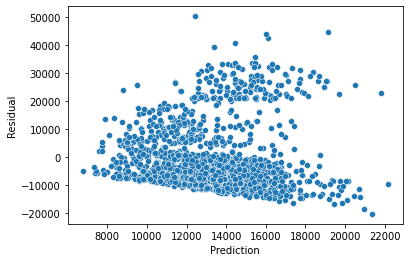

In [ ]:
#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

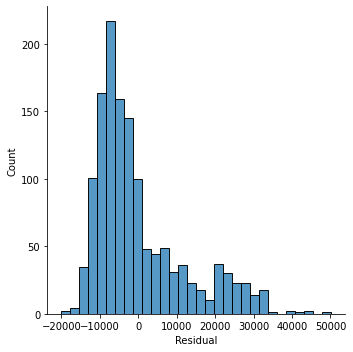

In [ ]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [ ]:
x=df_res['Residual']
pg.normality(x)

,W,pval,normal
Residual,0.857539,3.917131e-33,False


In [ ]:
pg.pairwise_corr(df,columns=['children','bmi'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,children,bmi,pearson,two-sided,1338,0.013,"[-0.04, 0.07]",0.0,-0.001,0.013,0.641,0.038,0.075


#Logit Analysis

In [ ]:
df['Churn_Numeric'] = df['churn'].apply(lambda x: 1 if x =='yes' else 0)
df.head()

In [ ]:
y=df['Churn_Numeric']
X=df[['total_intl_charge','number_customer_service_calls','account_length']]

In [ ]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

In [ ]:
# conduct regression
logit_model = sm.Logit(y, X).fit()

In [ ]:
# print model summary
print(logit_model.summary())

In [ ]:
### get the odds ratio
np.exp(logit_model.params)

In [ ]:
### get the predictions 
pred_prob = logit_model.predict(X)
df_result=pd.DataFrame({'Pred_prob': pred_prob,'y':y})
df_result['Prediction']=df_result['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_result.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction = df_result['Prediction']
accuracy_score(y, Prediction)

# Cross Validation

In [ ]:
## get the train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
# conduct regression
logit_model = sm.Logit(y_train, X_train).fit()

In [ ]:
# print model summary
print(logit_model.summary())

In [ ]:
### get the predictions on the test data
pred_prob = logit_model.predict(X_test)
df_test=pd.DataFrame({'Pred_prob': pred_prob,'y_test':y_test})
df_test['Prediction']=df_test['Pred_prob'].apply(lambda x: 1 if x >=0.5 else 0)
df_test.head()

In [ ]:
from sklearn.metrics import accuracy_score
Prediction =df_test['Prediction']
accuracy_score(y_test, Prediction)

### draw confusion matrix
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
from sklearn.metrics import confusion_matrix
confmtrx = np.array(confusion_matrix(y_test, Prediction))
pd.DataFrame(confmtrx, index=['Non-Churn','Churn'],
columns=['predicted_Non_Churn', 'predicted_Churn'])

#Calculate the F1 score
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, Prediction)

# Cross validation for multiple times

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()
scores = cross_val_score(log_reg, X, y, cv=10)
print('Cross-Validation Accuracy Scores', scores)

In [ ]:
scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

# Appendix

In [ ]:
Z =np.linspace(-100,100,10000)
P=np.exp(Z)/(1+np.exp(Z))
import plotly.express as px
fig = px.scatter(x=Z, y=P)
fig.show()